In [71]:
import pandas as pd
from functions import baza_danych_projektowych_to_csv

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)

baza_danych_projektowych_to_csv()
# Import database from excel sheet. It is organized in columns [variable | unit | symbol | value]
# You can set index col (you can take symbol for cleaner formulas)


# df8 = pd.read_excel("../../database/ml_projekty.xlsx", sheet_name="Baze", index_col="index")
# df8 = df8[17:36]
plane_prop= pd.read_csv("../../database/plane_properties.csv", index_col="Dana")
# display(df.head(10))
# df8.columns

# plane_prop[""]




In [72]:
plane_prop.at["Lambda", "Wartość"]

6.59

In [73]:

def get_prop(variable:str)->float: 
    return float(plane_prop.at[variable, "Wartość"])



In [74]:
from  math import pi
kghn = get_prop("kghn")
kghn_prim = get_prop("kghn'")
kghm = get_prop("kghm")
kghm_prim = get_prop("kghm'")

mu = get_prop("mu")
kappa_h = get_prop("kappa'_h")

lamda = get_prop("Lambda")
a = get_prop("a")
alpha_0 = get_prop("alpha_0")  

a1 = get_prop("a1")
a2 = get_prop("a2")

b1 = get_prop("b1")
b2 = get_prop("b2")

depsdalpha = get_prop("deps_dalpha")

zs = get_prop("bar_zs")

xsaj = get_prop("xsaj")

xsa = get_prop("bar_xsa")

def get_cz(V:float)->float:
    
    mass=get_prop("mtow") - 50
    g = 9.81
    rho = 1.225
    S = get_prop("S")
    
    return mass*g/(1/2*rho*V**2*S)





In [75]:
def get_zs(cz):
    return zs*(2*cz*(1/(pi *lamda) - 1/a) - alpha_0)

def kappa_a1a():
    return kappa_h*a1/a

def a2b1():
    return 1- a2*b1/(a1*b2)

def partials():
    return 1-depsdalpha

def xn(cz):
    return (xsa + xsaj + get_zs(cz) + kappa_a1a()*partials())*kghn

def xn_p(cz): 
    return (xsa + xsaj + get_zs(cz) + kappa_a1a()*partials()*a2b1())*kghn_prim

def xm(cz):
    return (xsa + xsaj + get_zs(cz) + kappa_a1a()*(partials()+a/mu))*kghm

def xm_p(cz):
    return (xsa + xsaj + get_zs(cz) + kappa_a1a()*a2b1()*(partials()+a/mu))*kghm_prim

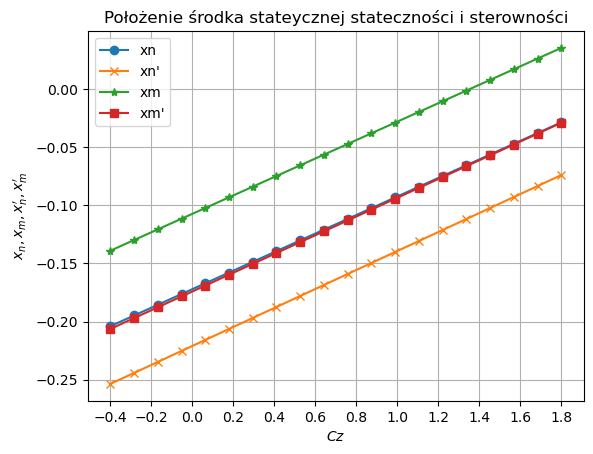

In [79]:
import numpy as np
import matplotlib.pyplot as plt
cz = np.linspace(-0.4, 1.8, 20)


fig, ax = plt.subplots()

# create above plots but with different markers
ax.plot(cz, xn(cz), label="xn", marker="o")
ax.plot(cz, xn_p(cz), label="xn'", marker="x")
ax.plot(cz, xm(cz), label="xm", marker="*")
ax.plot(cz, xm_p(cz), label="xm'", marker="s")

ax.set_xlabel("$Cz$")
ax.set_ylabel("$x_n, x_m, x_n', x_m'$") 

ax.set_title("Położenie środka stateycznej stateczności i sterowności")

ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.legend()
ax.grid()

plt.savefig("../latex_raport/imgs/xn_cz.png", dpi = 200)



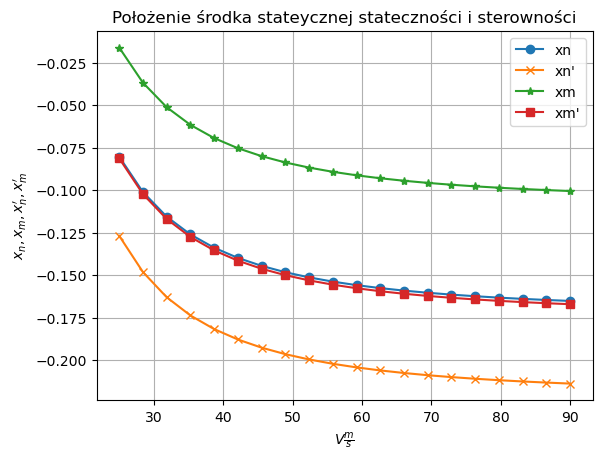

In [78]:
import numpy as np
import matplotlib.pyplot as plt


v = np.linspace(25, 90, 20)
cz = get_cz(v)

fig, ax = plt.subplots()

# create above plots but with different markers
ax.plot(v, xn(cz), label="xn", marker="o")
ax.plot(v, xn_p(cz), label="xn'", marker="x")
ax.plot(v, xm(cz), label="xm", marker="*")
ax.plot(v, xm_p(cz), label="xm'", marker="s")

ax.set_xlabel("$V \\frac{m}{s}$")
ax.set_ylabel("$x_n, x_m, x_n', x_m'$") 

ax.set_title("Położenie środka stateycznej stateczności i sterowności")

# ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.legend()
ax.grid()

plt.savefig("../latex_raport/imgs/xn_v.png", dpi = 200)

